In [134]:
import scanpy as sc
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [135]:
# load the cancer subtype annotation from 
data = sc.read('../data/raw_data/scRNA_AyseBassez2021NatMed_Raw.h5ad').obs
data.index = data.index+'-1'
# load the cell line prediction
prediction = pd.read_csv('../data/embedding/layer3_latent30_dr3/prediction.csv',index_col=0)
# merge the cancer subtype into the cell line prediction for each cell
data = data.merge(prediction,left_index=True,right_index=True,how='inner')
# load the cell line annotation
annot = pd.read_csv('../results/cellline.csv',index_col=0)
annot['subtype'] = annot['subtype'].map({
0:'ER+',
1:'ER+',
2:'HER2+',
3:'TNBC',
4:'TNBC'
})
# map the cell line molecular type into patient data
cl = data.merge(annot,left_on='CellLine_prediction',right_on='CellLine'
               )[annot.columns.tolist()+['Cancer_Subtype']].drop('CellLine',axis=1)

## The percentage of cell line molecular subtype  in three cancer subtypes

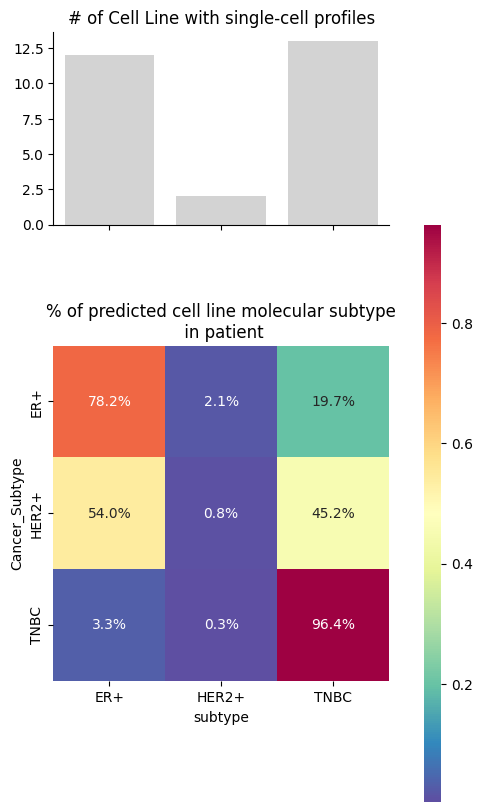

In [136]:
fig, ((ax2, dummy_ax),(ax1, cbar_ax)) = plt.subplots(nrows=2, ncols=2, figsize=(5, 10), sharex='col',
                                                      gridspec_kw={'height_ratios': [1, 3], 'width_ratios': [20, 1]})


heat_df = pd.crosstab(cl['Cancer_Subtype'],cl['subtype'],normalize=0)
sns.heatmap(heat_df,cmap='Spectral_r',
            square=True,
            annot=True,
            fmt = '.1%',
            ax=ax1,
            cbar_ax=cbar_ax,
           )
ax1.set_title('% of predicted cell line molecular subtype\n in patient')
x_ticks = heat_df.columns
x_tick_pos = [i + 0.5 for i in range(len(x_ticks))]
ax2.bar(x_tick_pos, annot['subtype'].value_counts()[x_ticks], align='center',color='lightgray')
ax2.set_xticks(x_tick_pos)
ax2.set_xticklabels(x_ticks)
ax2.spines[['right', 'top']].set_visible(False)
dummy_ax.axis('off')
ax2.set_title('# of Cell Line with single-cell profiles')
ax2.set_xlabel('')
plt.subplots_adjust(hspace=0)

fig.savefig('../figures/celline_align_with_patient_subtype.svg',bbox_inches='tight')